# 磁性材料基本特性的研究

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 测量饱和磁滞曲线

表格存储在"a.csv"中，输出到"a_out.csv"及"a_out.xlsx"。

其中UR1, UC，UR1', UC'分别是上曲线和下曲线的UR1, UC值（务必包含起始和终点，可以乱序）
UR1''及UC''为六个特殊点。

In [49]:
R1 = 9.24
R2 = 1.0391e3
L = 3.61e-2
C = 4.956e-6
N1 = 100
N2 = 100
S = 1.25e-5

以上为需要填写的数据

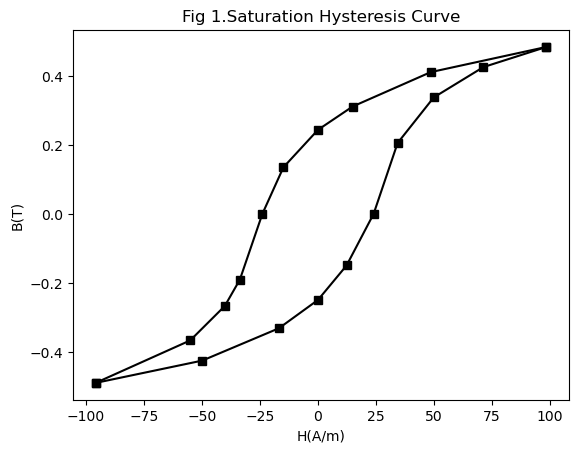

B = 0.48366730003199987 T; H = 98.42189205070092 A/m
B = -0.4898470355519999 T; H = -95.81369692173017 A/m
B = 0.24348157948799998 T; H = 0.0 A/m
B = 0.0 T; H = -23.959420081303737 A/m
B = -0.24933172911359994 T; H = 0.0 A/m
B = 0.0 T; H = 23.959420081303737 A/m


In [50]:
def calc_H(U, R, L, N):
    return U*N/(L*R)

def calc_B(U, R, S, C, N):
    return U*R*C/(N*S)

a = pd.read_csv('a.csv')
UR1 = np.array(a['UR1']) * 10**(-3)
UC = np.array(a['UC']) * 10**(-3)
index = UC.argsort()
plt.plot(calc_H(UR1[index], R1, L, N1), calc_B(UC[index], R2, S, C, N2), 'k-s')

UR1 = np.array(a["UR1'"]) * 10**(-3)
UC = np.array(a["UC'"]) * 10**(-3)
index = UC.argsort()
plt.plot(calc_H(UR1[index], R1, L, N1), calc_B(UC[index], R2, S, C, N2), 'k-s')

plt.xlabel('H(A/m)')
plt.ylabel('B(T)')
plt.title('Fig 1.Saturation Hysteresis Curve')
plt.show()

for (i, j) in zip(a["UR1''"], a["UC''"]):
    if np.isnan(i) or np.isnan(j):
        continue
    # print(f"UR1 = {i} mV; UC = {j} mV")
    print(f"B = {calc_B(j * 10**(-3), R2, S, C, N2)} T; H = {calc_H(i * 10**(-3), R1, L, N1)} A/m")


In [51]:
a_out = pd.DataFrame()
a_out['UR1(mV)'] = list(set(list(a['UR1']) + list(a["UR1'"])))
a_out['UC(mV)'] = list(set(list(a['UC']) + list(a["UC'"])))
a_out['B(T)'] = calc_B(a_out['UC(mV)'], R2, S, C, N2)
a_out['H(A/m)'] = calc_H(a_out['UR1(mV)'], R1, L, N1)
a_out.to_csv('a_out.csv', index=False)
a_out.to_excel('a_out.xlsx', index=False)

## 测量居里温度

表格数据存储在"b.csv"中。
其中"T"为温度，"U"为电压。

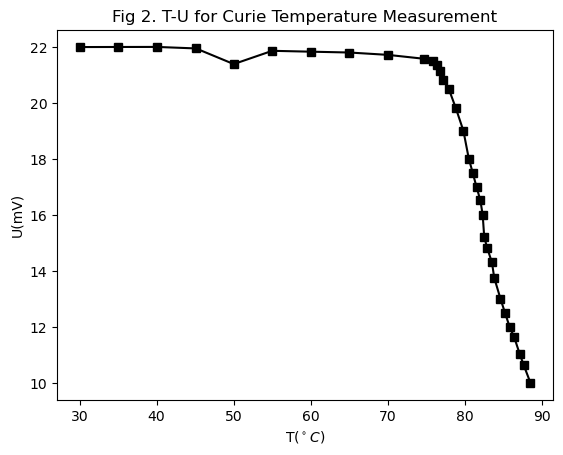

In [52]:
b = pd.read_csv('b.csv')

T = np.array(b['T'])
U = np.array(b['U'])

plt.plot(T, U, 'k-s')
plt.xlabel(r'T($^\circ C$)')
plt.ylabel(r'U(mV)')
plt.title('Fig 2. T-U for Curie Temperature Measurement')
plt.show()

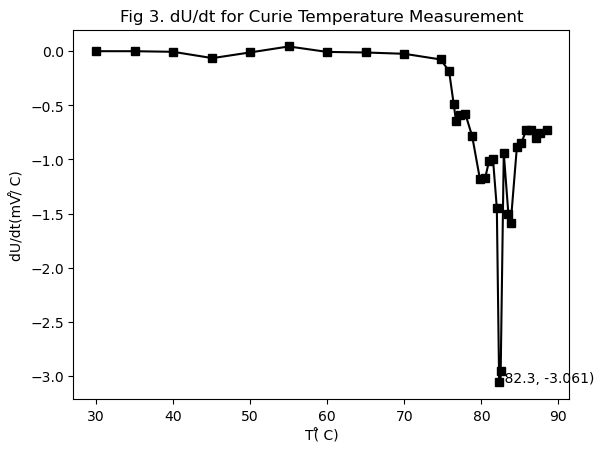

Curie Temperature is 82.3 ̊ C where dU/dt is -3.0609999999999644 mV/̊ C


In [53]:
dU_dt = np.gradient(U, T)
plt.plot(T, dU_dt, 'k-s')
minpos = np.argmin(dU_dt)
plt.text(T[minpos], dU_dt[minpos], f"({T[minpos]}, {dU_dt[minpos]:.3f})")
plt.xlabel(r'T(̊ C)')
plt.ylabel(r'dU/dt(mV/̊ C)')
plt.title('Fig 3. dU/dt for Curie Temperature Measurement')
plt.show()


print(f"Curie Temperature is {T[np.argmin(dU_dt)]} ̊ C where dU/dt is {np.min(dU_dt)} mV/̊ C")

b_out = pd.DataFrame()
b_out['T(̊ C)'] = T
b_out['U(mV)'] = U
b_out['dU/dt(mV/̊ C)'] = dU_dt
b_out.to_csv('b_out.csv', index=False)
b_out.to_excel('b_out.xlsx', index=False)